# Citation & APR3 matching

    Welcome to a simple example of how to use the apr3tocit function. The goal of this example is to demonstrate the code and help with understanding what is happening. 
    
    First we will load in some background packages needed: 
       1) awot (needed to open the Citation file, https://github.com/swnesbitt/AWOT)
       2) add_params_und.py (this adds a few varibles to the reader like HVPS Nt, https://github.com/dopplerchase/OLYMPEX)
       3) numpy (standard math functionality)
       4) apr3tocit.py (https://github.com/dopplerchase/APR3Tools)
           You will need several packages for this to work. 
           a) pyhdf (https://github.com/fhs/python-hdf4 , to open apr3 file)
           b) scipy (standard scipy package, for kdTree)
           c) pyresample (https://github.com/pytroll/pyresample , for swath plot)
           d) pyproj (for Proj, to calculate cartiesian distances)
       

In [1]:
import awot
from add_params_und import add_params_und
import numpy as np
from apr3tocit_tools import apr3tocit


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119 


 Example 1: December 3rd 2015 15:09 DC-8 flight leg (and GPM overpass) 

Make sure you download the two files in the examples folder. **DISCLAIMER: these are not offical files, please download the offical files if conducting research for publication or presentation**

In [2]:
und_map = add_params_und() #add a few params to read in
flname = '15_12_03_13_35_43.olympex' #citation file string
fl = awot.io.flight.read_nasa_ames(flname,platform=None,mapping_dict=und_map) #load in awot object

filename = 'OLYMPEX_APR3_20151203_150904_23.HDF' #apr3 file string

/data/keeling/a/randyjc2/anaconda2/lib/python2.7/site-packages/numpy/ma/core.py:2296: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))


## Understanding the apr3tocit function
    
    Now that we have the files prepared lets go through what the function takes.
        1) it takes the filename of the apr3 file
        2) it takes the awot object of the citation data
        3) the sphere_size is what is the largest distance you will accept to be matched. 
        4) query_k is how many gates you wish to consider. 
            a) query_k = 1 will return the closest gate
            b) query_k > 1 will return a distance weighted average of the closest query_k gates.
            c)plotson = True will return a few graphics (default is False) 

## Closest Gate Example    

    Lets get our hands dirty. The next cell will find the closest gate (in space) to the citation. It will spit out somethings while it runs. No need to worry! These are by design. 
        1) It says no W band because the W nadir band is missing in this file. 
        2) This is the number of citation 1-s points in the radar curtain time
        3) 'gate outside...' this means there was at least one gate greater than 1 km away.
        4) Same as 2, Average time difference (min, gate - citation), average distance (m)
        5) same as 1 

    What it will spit out figure wise is:
        1) Timeseries of matched Ku,Ka
        2) Histograms of time and distance 
        3) a swath and scatter of citation points on the swath

No W band
(1035,)
gate was outside distance upper bound, eliminating those instances
(1035, 4.4288132045088568, 142.1845685464167)
No W band


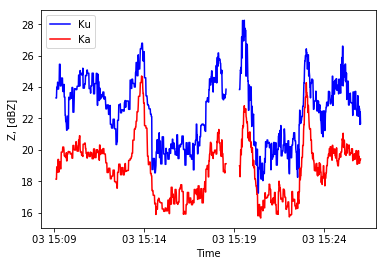

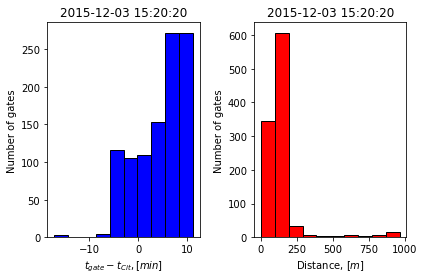

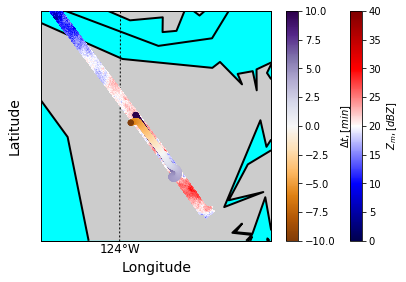

done


In [6]:
matched = apr3tocit(filename,fl,1000,query_k = 1,plotson=True)

## What is in matched?

    Let's now look in what it returns. We can do matched.keys() to how the dict is split up

In [4]:
matched.keys()

['APR', 'kdtree', 'matched', 'Cit']

    'APR': is the orignal radar data
    'kdtree': is the information returned from running kdTree
    'matched': this is what you most likely want
    'Cit': original citation data

In [5]:
matched['matched'].keys()

['lon_r',
 'Ka',
 'dist',
 'dif_t',
 'time_r',
 'conc_hvps3',
 'alt_r',
 'lat_c',
 'DFR',
 'lon_c',
 'array index',
 'Ku',
 'time_c',
 'alt_c',
 'lat_r']

    Anything with the _r is from the radar, and _c is the citation. 
    distance: is the cart. distance between the gates and the cit. 

## Barnes Weighted Average Example

    Now we will use more than one gate and average them by distance (closer gates have higher weights) 

No W band
(1035,)
(1035, 5.1158312191020832, 250.49599312482744)
No W band


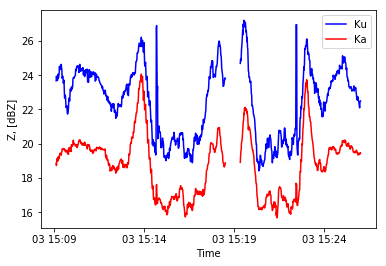

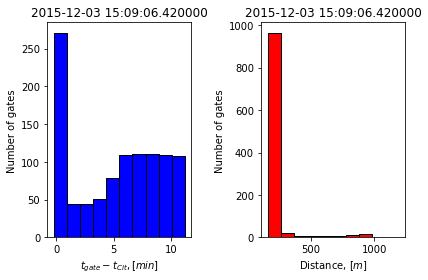

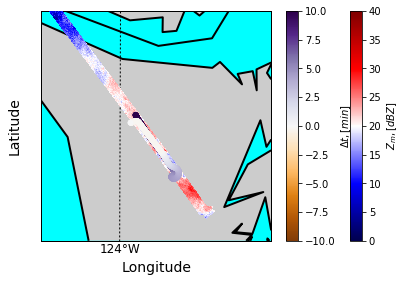

done


In [8]:
matched = apr3tocit(filename,fl,2000,query_k = 20,plotson=True)

    Look at the time series. I think there may be a skin paint (where the radar is hitting the plane) where the reflectivity spikes. I will have to work on removing this if the hypothesis is correct. 